# **Introdução**

## Desafio

Utilizando uma base de dados de coletas de sangue em universidades feitas por veículo móvel em Taiwan nós temos por objetivo identificar a probabilidade de cada doador fazer uma doação em março de 2007.

## Contexto

O problema pode ser inserido no contexto dos desafios gerais relacionados a doação de sangue, mais especificamente, na necessidade de se equilibrar oferta de sangue em relação a demanda ao longo do tempo. A questão se torna especialmente complexa considerando que as doações de sangue seguem variações sanzonais causadas por, dentre outros fatores, ocorrência de feriados, mudanças de estações do ano, eventos como campanhas de vacinação (BIANCO, 2013, p. 231), além de feriados bancários e campanhas de doação (OLIVEIRA et. al., 2013). Esses fatores devem ser considerados para fins de prever doações futuras, auxiliando no uso racional de recursos escassos na coleta, distribuição e armazenamento de sangue de maneira adequada ao longo do ano.

Outra questão relevante é a dos diferentes tipos de doadores de sangue. Doadores de sangue podem ser classificados como *recorrentes* e de *primeira vez* o que pode afetar o número de novas doações e o tempo entre doações, com doadores recorrentes retornando de maneira mais frequente e realizando mais doações (DE ALMEIDA NETO, 2012, p. 4-6). Deve-se levar essa diferença em consideração na hora em vista de resolver o desafio em tela.

Finalmente, devemos considerar o contexto geral de doação de sangue em Taiwan. Apesar de algumas dificuldades recentes relacionadas a falta de sangue do tipo A (DEAETH, 2019), o país parece apresentar boas taxas de doação de sangue quando comparado globalmente (EVERINGTON, 2018; TAIWAN BLOOD SERVICES FOUNDATION, 2013). Ainda assim o envelhecimento da população pode demandar maior o volume de sangue coletado para futuro próximo.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Machine Learning Canvas**
 
## Análises Propostas
 
Partindo dos dados disponibilizados e das informações obtidas na imersão, nós pretendemos utilizar de algorítimos de classificação para prever a probabilidade de se doar ou não sangue em março de 2007.

## Fontes de Dados
 
Nossa base de dados vem do repositório de Machine Learning da UCI. Os dados foram coletados por veículo de doação de sangue em Taiwan, organizados pela “Taiwan blood services foundation” (Fundação de hemo-serviços taiwanesa), em diferentes universidades.
 
## Recursos Técnicos
 
Python: Sklearn, Matplot, NumPy, Pandas.
Google Drive: Para juntar as informações e dados de pesquisas.
Trello: Para a organização das atividades do grupo.
Algoritmos: Ada Boosting, Arvore de decisão, Floresta Aleatória, k-means, Rede Neural, Regressão Logística e SVM.
Ferramenta para visualização dos dados: MicroStrategy e Python
 
## AI values
 
A partir de nossa base de dados, bem como das ferramentas utilizadas, temos por objetivo criar um modelo capaz de prever corretamente a reincidência na doação de sangue. Para isso será necessário: 

1.  Analisar, limpar, separar e normalizar os dados.
2.  Testar distintos algorítimos, com hiperparâmetros diversos, utilizando dados de treinamento e validação. A partir disso vamos escolher os hiperparâmetros que apresentarem melhores melhores resultados segundo certas métricas (mas priorizando a "pontuação F1" por melhor representar o desbalanceamento dos dados).
3.  Testar todos os algorítimos com base nos dados de teste e escolher aquele que apresentar melhor performance.
4   Entrega dos resultados.
 
 
## Principais Riscos
 
Os principais riscos estão na má alocação de recursos causada por erros de identificação das probabilidades reais. Se as probabilidades calculadas forem superiores às reais, o veículo de coleta pode acabar comprando e trazendo mais material do que necessário; se elas forem abaixo da realidade, o veículo pode trazer menos recursos do que o necessário para as coletas. Em suma: há o risco de que erros em previsões se transformem em problemas (de desperdício ou escassez de material) na coleta de sangue.   

Outro risco consiste no atraso da entrega dos resultados. Isso pode ocorrer por diversos fatores: necessidade de coleta de novos dados, erros de coletas nos dados fornecidos pelo stakeholder, problemas técnicos, dentre outros.

Há também riscos técnicos de os dados serem insuficientes ou inadequados para modelagem. Isto é, podemos não conseguir treinar modelos adequados para a realização de previsões.
 
## Principais Stakeholders
 
*Nesse caso em específico*, o stakeholder interessado é o "Blood Transfusion Service Center", responsável pela coleta de sangue, que deseja saber se alguém vai ou não doar na sua próxima ida ao campus (prevista para março de 2007).
 
## Canal de Entrega
 
Relatório técnico (Visualização + código)
 
## Métricas de Sucesso
 
 
A partir de nosso modelo, esperamos conseguir prever corretamente pelo menos 70% das doações de sangue em março de 2007. Para tanto, vamos nos utilizar dos recursos disponíveis nas bibliotecas de Python visando ajustar os erros no nosso modelo para aprimorar nossas predições. 
 
Por fim, pretendemos avaliar os modelos de classificação segundo algumas métricas. Estas são: a acurácia (total de classificações corretas); a precisão (total de classificações positivas verdadeiras); a precisão (total de classificações positivas verdadeiras sobre o total de classificações positivas); a sensibilidade/revocação (quantos do total de positivos verdadeiros foram capturados pelo modelo); pontuação F1 macro (a média aritimética das notas F1 por classe) e; área sobre a curva ou AUC (avalia a relação entre especificidade, ou total de negativos verdadeiros sobre negativos pevistos, e revocação) dos modelos testados. 

# **Análise preliminar dos dados**

## Preparando o notebook

Antes de passarmos para a análise dos dados propriamente dita, é necessário realizar algumas tarefas preliminares no notebook. Essas são: a importação e atualização (quando necessária) das bibliotecas utilizadas; a modificação da notação científica para valores mais "legíveis"; e chamar o programa "autotime" para acompanhar o tempo necessário para rodar cada célula de código.

In [2]:
# Atualizando bibliotecas
!pip install factor_analyzer
!pip install plotly --upgrade
!pip install sklearn --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)
Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [3]:
# Dataframe e matemática
import numpy as np
import pandas as pd

# Visualização

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay

# Machine Learning: Algorítimos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential 
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam


# Machine Learning: split, grid search e cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# Métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


# Mensuração de tempo
import time


In [4]:
# Alterando a notação científica para valores até duas casas depois da vírgula
pd.options.display.float_format= "{:.2f}".format

# Avaliando o tempo do código por célula
!pip install ipython-autotime
%load_ext autotime

# Aumentando a fonte dos gráficos:
sns.set(font_scale=1.1)


time: 4.5 ms (started: 2021-04-26 23:40:25 +00:00)


## Improtação e análise dos dados

Em termos quantitativos, os nossos dados consistem em tabela formada por cinco colunas (as primeiras quatro são nossas variáveis independentes, ou preditoras, e a última é a variável dependente, ou resultado): "Months since Last Donation",	"Number of Donations",	"Total Volume Donated (c.c.)", "Months since First Donation",	"Made Donation in March 2007". Todas estão em valores integrais e possuem 748 linhas com valores não nulos. 

Em termos de escala, a variável "Total Volume Donated (c.c.)" se diferencia das demais (variando de 250 a 12500); também é distinta a variável de interesse ("Made Donation in March 2007) que assume só valores 1 e 2. As demais apresentam escala similar, com valores entre 0 e 100. 

Ainda, há muito mais não doadores do que doadores no dataset o que significa que ele está desbalanceado. Isso cria desafios para realizar previsões e torna métricas como acurácia pouco confiáveis para avaliar os modelos.

Passamos então a próxima etapa: a limpeza do dataset.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Cópia de G4_blood-donation.csv')

time: 11.7 ms (started: 2021-04-26 23:40:25 +00:00)


In [6]:
df

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


time: 25.2 ms (started: 2021-04-26 23:40:25 +00:00)


In [7]:
df.columns = ["Months since Last Donation",	"Number of Donations",	"Total Volume Donated (c.c.)", "Months since First Donation",	"Made Donation in March 2007"]

time: 1.63 ms (started: 2021-04-26 23:40:25 +00:00)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   748 non-null    int64
 1   Number of Donations          748 non-null    int64
 2   Total Volume Donated (c.c.)  748 non-null    int64
 3   Months since First Donation  748 non-null    int64
 4   Made Donation in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
time: 9.3 ms (started: 2021-04-26 23:40:25 +00:00)


In [9]:
df.isnull().sum(axis = 0)

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

time: 16.2 ms (started: 2021-04-26 23:40:25 +00:00)


In [10]:
df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,748.00,748.00,748.00,748.00,748.00
mean,9.51,5.51,1378.68,34.28,1.24
std,8.10,5.84,1459.83,24.38,0.43
min,0.00,1.00,250.00,2.00,1.00
25%,2.75,2.00,500.00,16.00,1.00
50%,7.00,4.00,1000.00,28.00,1.00
75%,14.00,7.00,1750.00,50.00,1.00
max,74.00,50.00,12500.00,98.00,2.00


time: 30.7 ms (started: 2021-04-26 23:40:25 +00:00)


In [11]:
# Avaliando a assimetria entre as classes
N_Doou = df[df["Made Donation in March 2007"] == 1].count()["Made Donation in March 2007"]
Doou = df[df["Made Donation in March 2007"] == 2].count()["Made Donation in March 2007"]
print(f"O número de doadores é: {Doou}." + "\n" + f"O número de não doadores é: {N_Doou}." + "\n" + "Isso significa que o dataset está desbalanceado.")

O número de doadores é: 178.
O número de não doadores é: 570.
Isso significa que o dataset está desbalanceado.
time: 21.3 ms (started: 2021-04-26 23:40:25 +00:00)


<Figure size 1440x1080 with 0 Axes>

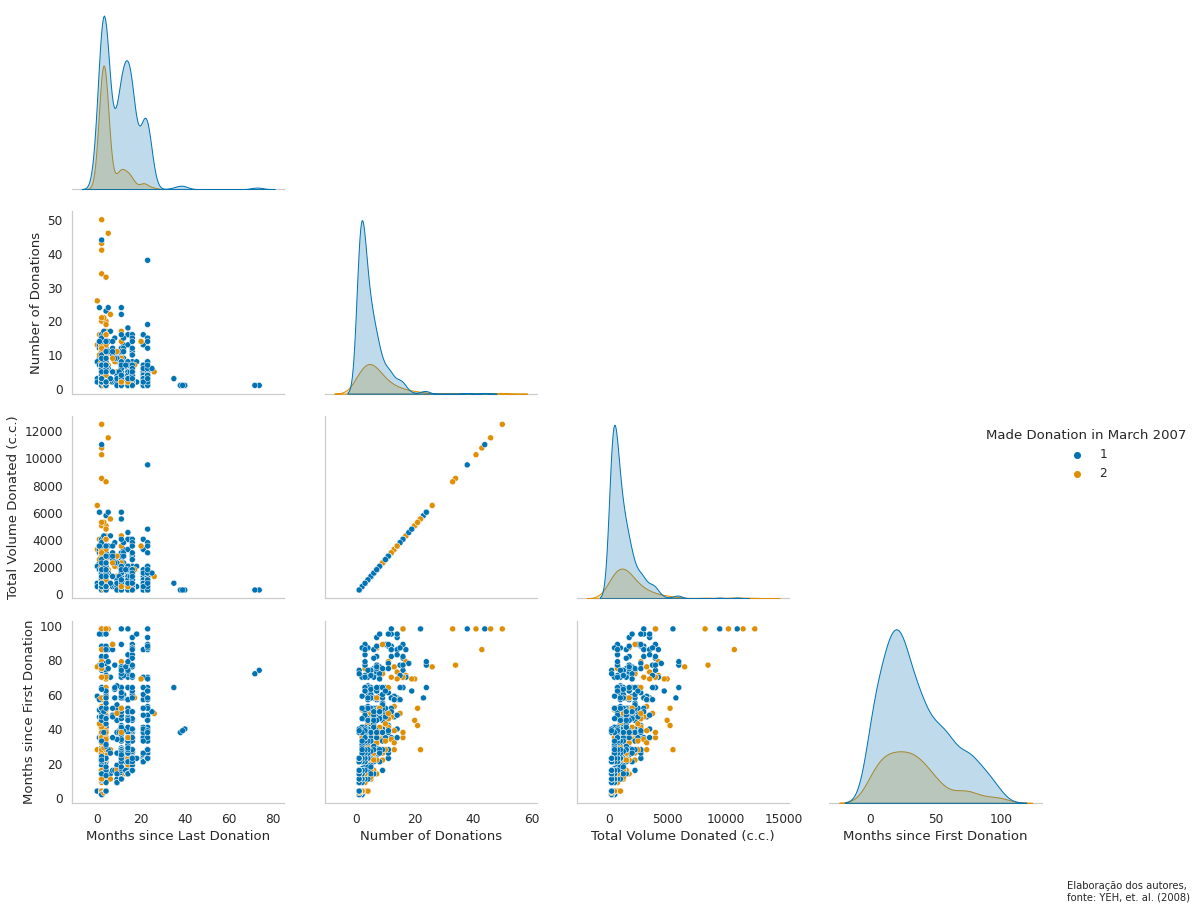

time: 7.18 s (started: 2021-04-26 23:40:25 +00:00)


In [12]:
# Criando um pairplot de todas as variáveis
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20, 15))
sns.pairplot(df, hue = 'Made Donation in March 2007', 
             palette = "colorblind",
             height = 3, 
             corner=True)
plt.figtext(1, -0.05, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)
plt.tight_layout()

Text(0.8, 0.06, 'Elaboração dos autores, \nfonte: YEH, et. al. (2008)')

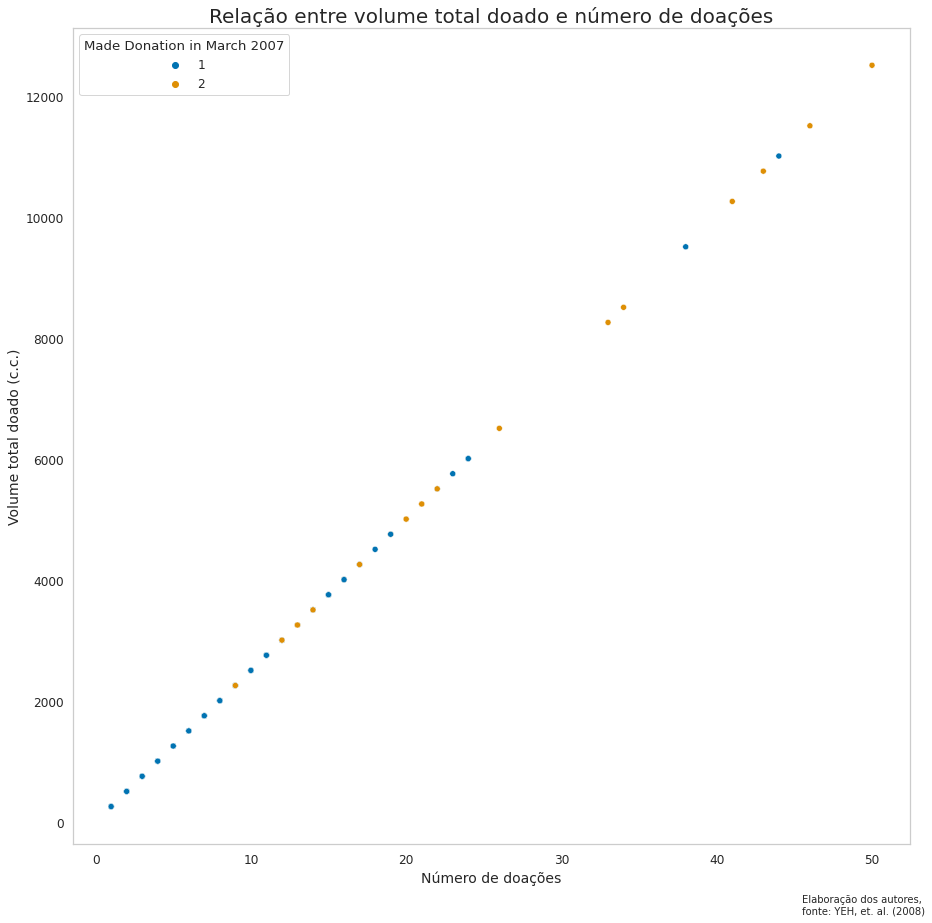

time: 582 ms (started: 2021-04-26 23:40:32 +00:00)


In [13]:
# Observando mais de perto a relação entre número de doações e volume doado
plt.figure(figsize = (15,15))
sns.scatterplot(x = "Number of Donations",
                y = "Total Volume Donated (c.c.)",
                hue = "Made Donation in March 2007",
                data = df,
                palette = "colorblind")
plt.xlabel("Número de doações",fontsize = 14)
plt.ylabel("Volume total doado (c.c.)", fontsize = 14)
plt.title("Relação entre volume total doado e número de doações", fontsize = 20)
plt.figtext(0.8, 0.06, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)

# **Limpeza dos dados**




## Análise de outliers

Foram criados boxplots e histogramas para avaliar a presença de valores discrepantes ("outliers") na base de dados. Apesar dos resultados dos boxplots, uma vez que vemos as observações filtradas pelos valores superiors parece não haver valores incoerentes com o todo.

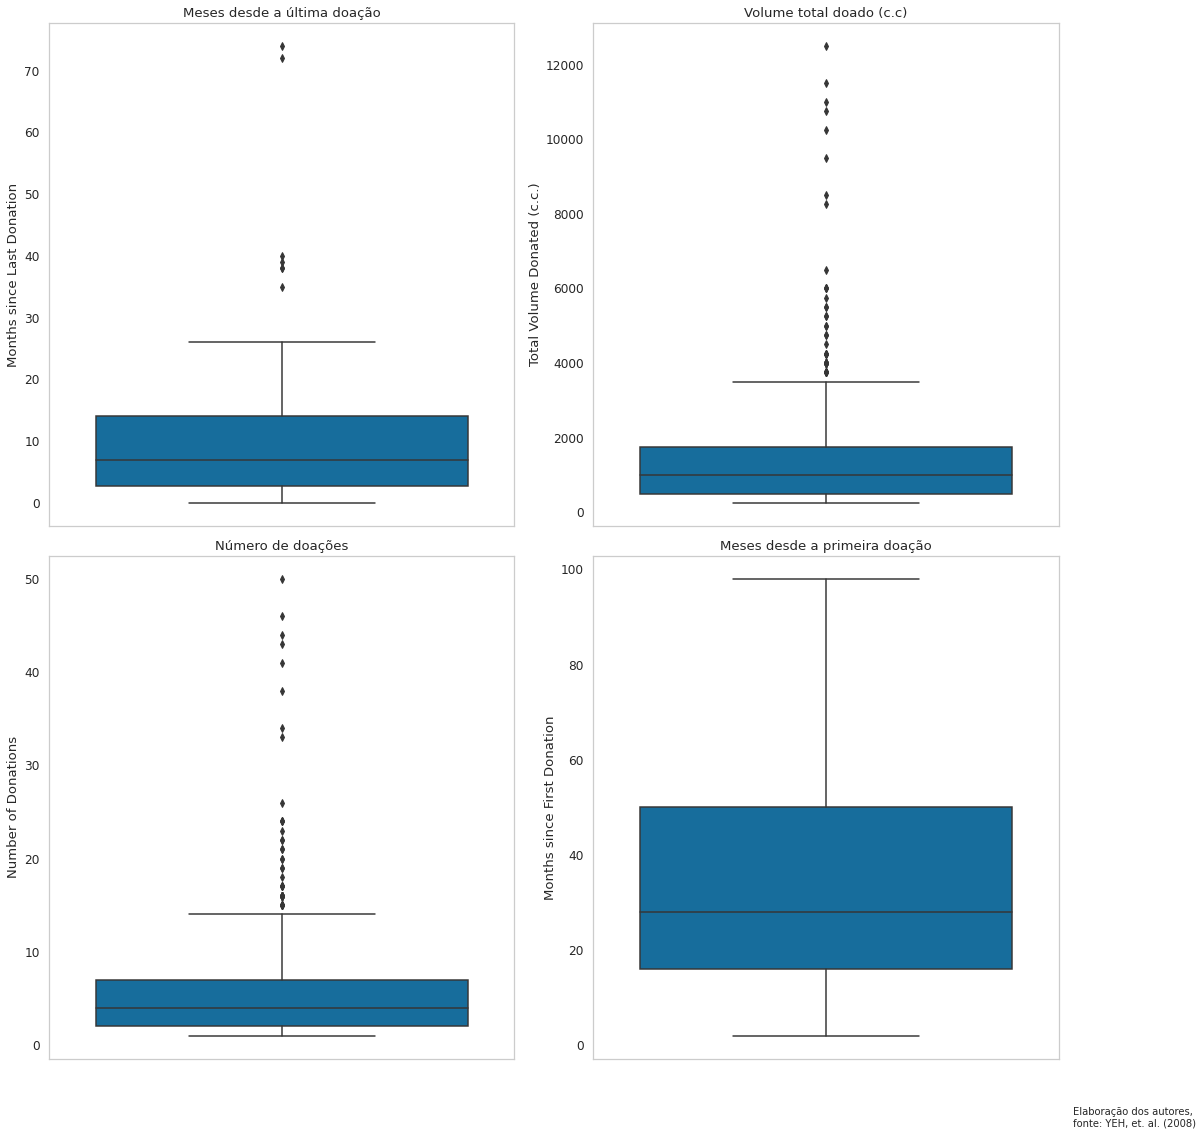

time: 817 ms (started: 2021-04-26 23:40:33 +00:00)


In [14]:
# Separando os boxplots em subplots 2x2
fig, axs = plt.subplots(2,2, figsize = (15,15))

# Criando os boxplots por variável independente
sns.boxplot(y = "Months since Last Donation", data = df, ax = axs[0,0], palette="colorblind")
axs[0,0].title.set_text("Meses desde a última doação")



sns.boxplot(y = "Number of Donations", data = df, ax = axs[1,0], palette="colorblind")
axs[1,0].title.set_text("Número de doações")


sns.boxplot(y = "Total Volume Donated (c.c.)", data = df, ax = axs[0,1], palette="colorblind")
axs[0,1].title.set_text("Volume total doado (c.c)")


sns.boxplot(y = "Months since First Donation", data = df, ax = axs[1,1], palette="colorblind")
axs[1,1].title.set_text("Meses desde a primeira doação")

plt.figtext(1, -0.05, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)
plt.tight_layout()


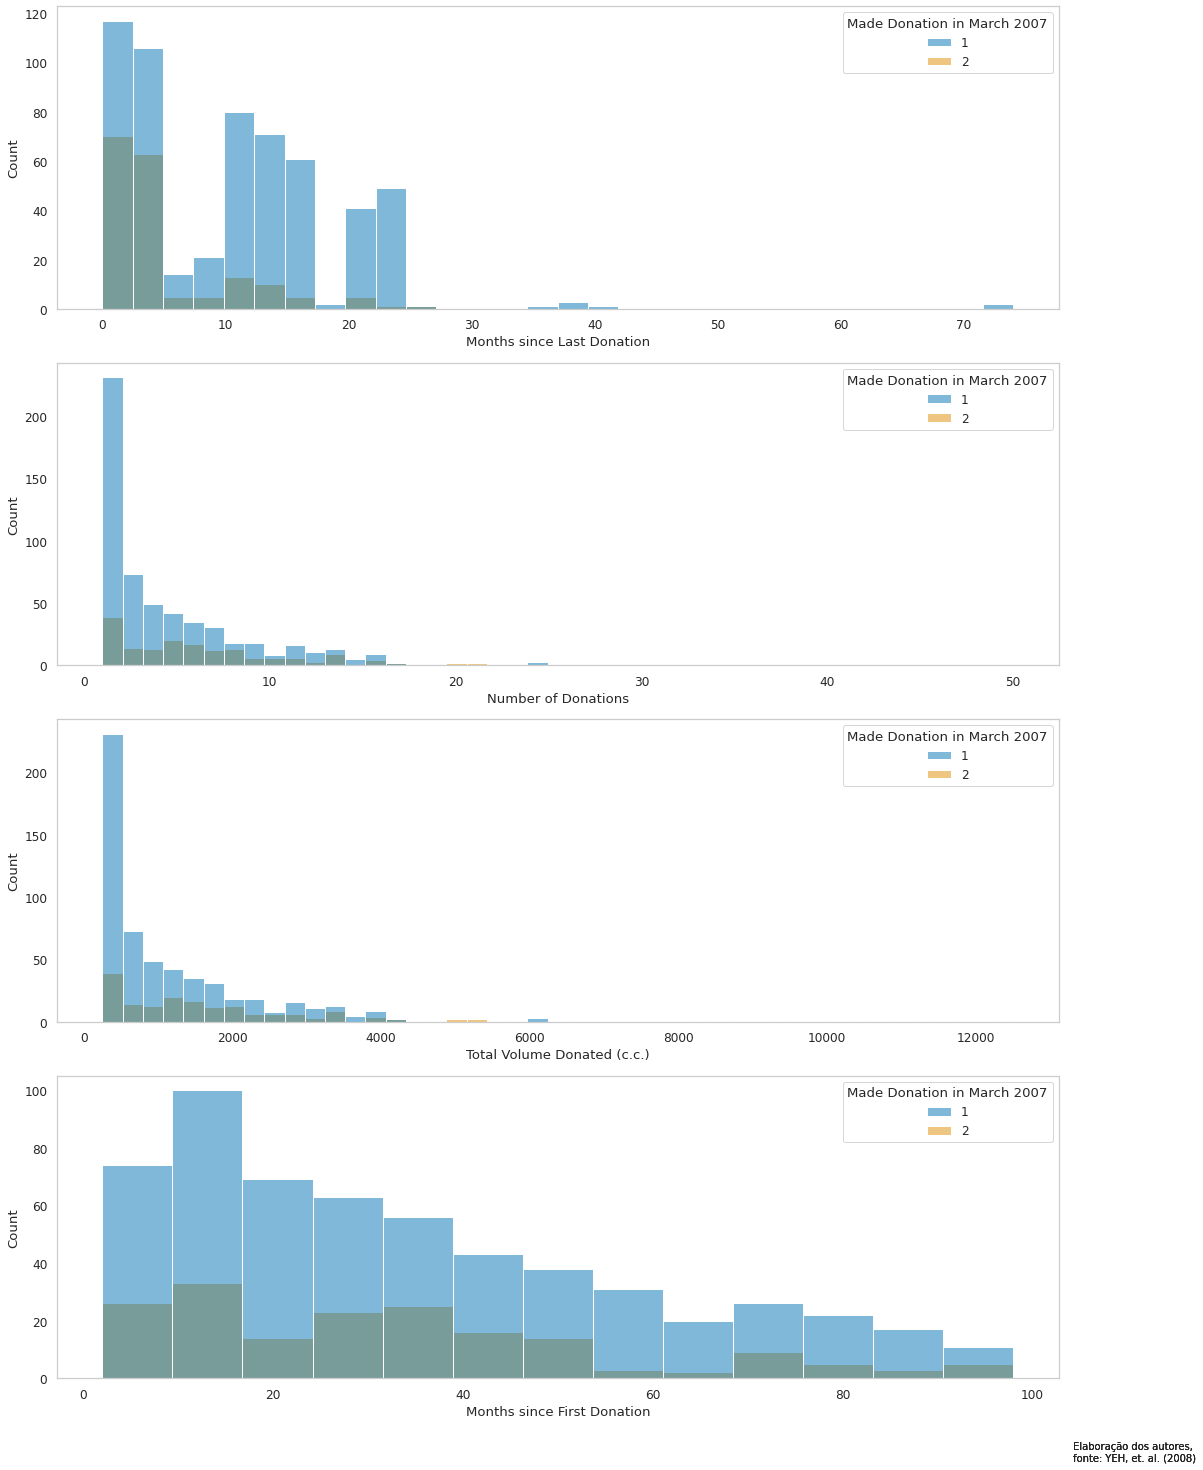

time: 2.64 s (started: 2021-04-26 23:40:34 +00:00)


In [15]:
#plotar Histograma para averiguar a existencia de dados dissoantes
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
sns.histplot(df, x='Months since Last Donation', hue='Made Donation in March 2007', palette ="colorblind")

plt.subplot(4,1,2)
sns.histplot(df, x='Number of Donations', hue='Made Donation in March 2007', palette ="colorblind")
plt.figtext(1, -0.02, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)

plt.subplot(4,1,3)
sns.histplot(df, x='Total Volume Donated (c.c.)', hue='Made Donation in March 2007', palette ="colorblind")
plt.figtext(1, -0.02, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)

plt.subplot(4,1,4)
sns.histplot(df, x='Months since First Donation', hue='Made Donation in March 2007', palette ="colorblind")
plt.figtext(1, -0.02, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)
plt.tight_layout()

In [16]:
# Verificando outliers da coluna 'meses desde a última doação'.
df[df["Months since Last Donation"] > 30].sort_values("Months since Last Donation", ascending = False) 

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
499,74,1,250,74,1
747,72,1,250,72,1
498,40,1,250,40,1
746,39,1,250,39,1
496,38,1,250,38,1
497,38,1,250,38,1
495,35,3,750,64,1


time: 31.7 ms (started: 2021-04-26 23:40:36 +00:00)


In [17]:
# Verificando outliers da coluna 'número de doações'.
df[df["Number of Donations"] > 12].sort_values("Number of Donations", ascending = False) 

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,2
9,5,46,11500,98,2
503,2,44,11000,98,1
500,2,43,10750,86,2
505,2,41,10250,98,2
...,...,...,...,...,...
254,12,13,3250,59,1
13,1,13,3250,47,1
363,21,13,3250,57,1
276,14,13,3250,57,1


time: 28.3 ms (started: 2021-04-26 23:40:36 +00:00)


In [18]:
# Verificando outliers da coluna 'volume total doado'.
df[df["Total Volume Donated (c.c.)"] > 3500].sort_values("Total Volume Donated (c.c.)", ascending = False)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,2
9,5,46,11500,98,2
503,2,44,11000,98,1
500,2,43,10750,86,2
505,2,41,10250,98,2
341,23,38,9500,98,1
502,2,34,8500,77,2
517,4,33,8250,98,2
504,0,26,6500,76,2
4,1,24,6000,77,1


time: 29.5 ms (started: 2021-04-26 23:40:36 +00:00)


## Modificação da coluna target

No dataset original os valores para "doou sangue em março de 2007" (2) e "não doou sangue em março de 2007" (1). Esses valores estão fora da convenção utilizadas para variáveis booleanas; por isso, eles foram substituidos por 1 e 0 respectivamente.

In [19]:
# Mudando os valores de 'fez doação em março de 2007' para 0 e 1
df["Made Donation in March 2007"].replace({1:0, 2:1}, inplace = True)

time: 3.55 ms (started: 2021-04-26 23:40:36 +00:00)


## Avaliação da correlação entre variáveis e remoção de "Volume Total Doado"

Usamos de um mapa de calor para visualizar a matriz de correlação entre as variáveis. Notamos que a variáveis "Volume Total de Doado" ("Total Volume Donated (c.c)") é idêntica ao número de doações múltiplicado por uma constante. Como ela não traz informações novas relevantes para a previsão das doações, optamos por removê-la.

Text(0.75, -0.15, 'Elaboração dos autores, \nfonte: YEH, et. al. (2008)')

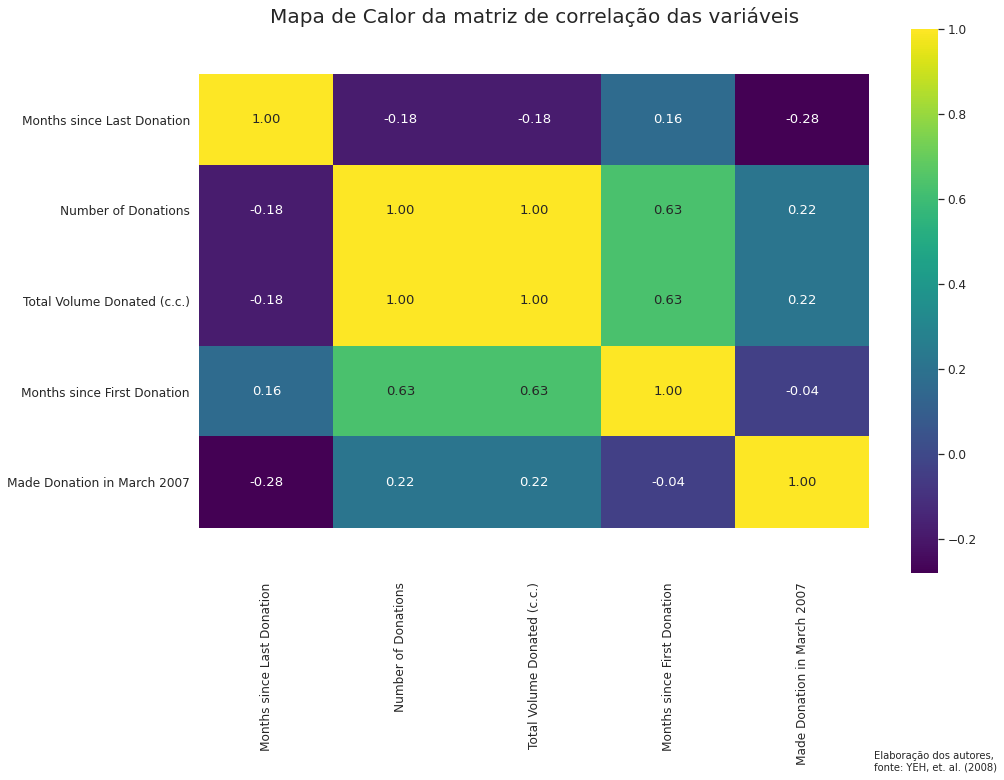

time: 544 ms (started: 2021-04-26 23:40:36 +00:00)


In [20]:
# Verificando correlação entre variáveis para avaliar se todas trazem informações distintas
corr = df.corr(method='pearson')

# Criando gráfico de calor
plt.figure(figsize=(15,10))

plt.title("Mapa de Calor da matriz de correlação das variáveis", fontsize = 20)
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap = "viridis")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.figtext(0.75, -0.15, "Elaboração dos autores, \nfonte: YEH, et. al. (2008)", fontsize = 10)

In [21]:
# Retirando a coluna "Total Volume Donated"
df = df.drop("Total Volume Donated (c.c.)", axis = 1)

time: 2.58 ms (started: 2021-04-26 23:40:37 +00:00)


In [22]:
df

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0
...,...,...,...,...
743,23,2,38,0
744,21,2,52,0
745,23,3,62,0
746,39,1,39,0


time: 28.5 ms (started: 2021-04-26 23:40:37 +00:00)


# **Aprendizado de máquina e previsão das (não) doações**

Nessa parte realizamos os procedimentos de aprendizado de máquina. Começando pela separação ("split") dos dados, seguida de sua formatação e uso para treinar e testar modelos de aprendizado de máquina. Em seguida comparamos os resultados dos modelos segundo as métricas selecionadas.

## Separação e formatação dos dados

Após a limpeza dos dados, passamos a separação e normalização destes. Os dados foram divididos em três partes: dados de treinamento, validação e teste. Em razão de haver mais não doadores do que doadores, a separação se deu de modo estratificado para manter essa proporção nos três conjuntos de dados. Por fim, os dados de treinamento foram normalizados utilizando por padrão (X_train).

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

time: 2.42 ms (started: 2021-04-26 23:40:37 +00:00)


In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Separando os dados em teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y,  random_state= 6)

#Separando os dados de treinamento em treinamento (final) e validação

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify = y_train, random_state= 6)


time: 14.2 ms (started: 2021-04-26 23:40:37 +00:00)


In [25]:
# Calculando as proporções do valor 1 entre os splits
prop_real = df[df["Made Donation in March 2007"] == 1]["Made Donation in March 2007"].count()/df["Made Donation in March 2007"].count()
prop_treino = y_train[y_train == 1].count()/y_train.count()
prop_teste = y_test[y_test == 1].count()/y_test.count()
prop_validação = y_val[y_val == 1].count()/y_val.count()

time: 8.96 ms (started: 2021-04-26 23:40:37 +00:00)


In [26]:
# Criando um Data Frame para avaliar se a proporção de valor 1 é identica nos datasets.
df_train_test_prop = pd.DataFrame([prop_real,prop_treino,prop_teste, prop_validação]).T
df_train_test_prop.rename(columns = {0:"Proporção Real", 1: "Proporção de Treinamento", 2: "Proporção de Teste", 3: "Proporção de Validação"}, 
                          inplace = True)
df_train_test_prop

,Proporção Real,Proporção de Treinamento,Proporção de Teste,Proporção de Validação
0,0.24,0.24,0.24,0.24


time: 18.6 ms (started: 2021-04-26 23:40:37 +00:00)


In [27]:
# Normalizando X_train

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Normalizando o resto

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

time: 8.8 ms (started: 2021-04-26 23:40:37 +00:00)


## Pesquisando hiperparâmetros

Antes de passarmos para a comparação de modelos, era necessário decidir quais os hiperparâmetros mais adequados para cada modelo. Para tanto utilizamos dos dados de treinamento e validação bem como da função GridSearch() do Scikit-Learn para pesquisar quais os "melhores" hiperparâmetros de cada modelo. 

Essa escolha foi tomada com base na pontuação F1 macro. Isso porque ela é boa representação das métricas sensibilidade e revocação. Além disso,ela leva em conta os dados desbalanceados ("penalizando" previsões que errem em demasia a classe minoritária, ou seja, a dos que doaram em março de 2007).

A pesqusia dos hiperparâmetros foi realizada em notebooks separados. Por limitações de tempo, não seria viável reproduzir neste colab tais análises. Todavia, elas permanecem disponíveis na pasta na qual esse documento se encontra.

## Avaliando incertezas

Antes de passarmos a seleção final dos modelos, realizamos uma validação cruzadas com 5 separações (folds) para cada modelo (Regressão Logística, Árvore de Decisão, Floresta Aleatóra, Ada Booster, SVM-SVC, KNN e Rede Neural) e verificamos a dispersão dos valores de cada métrica de avaliação. Os resultados dos modelos por métrica estão nos boxplots abaixo.

### Separando os modelos

In [28]:
# Regressão Logística
LR = LogisticRegression(C = 0.05, 
                        class_weight = "balanced",
                        penalty = "l2",
                        solver = "liblinear",
                        random_state = 6)

time: 3.67 ms (started: 2021-04-26 23:40:37 +00:00)


In [29]:
# Árvore de Decisão 
AD = DecisionTreeClassifier(criterion = "gini", 
                            max_depth = 80, 
                            min_samples_leaf = 1, 
                            min_samples_split = 10,
                            splitter = "random",
                            random_state = 6)

time: 3.52 ms (started: 2021-04-26 23:40:37 +00:00)


In [30]:
# KNN
KNN = KNeighborsClassifier(n_neighbors=5,
                           algorithm = "brute", 
                           leaf_size = 10,
                           metric = "minkowski",
                           p = 2).fit(X_train, y_train)

time: 4.14 ms (started: 2021-04-26 23:40:37 +00:00)


In [31]:
# Random Forest
RF = RandomForestClassifier(class_weight = 'balanced', 
                            max_features = "sqrt", 
                            min_samples_leaf = 1,
                            min_samples_split = 10,
                            n_estimators = 650,  
                            random_state = 6)

time: 2.69 ms (started: 2021-04-26 23:40:37 +00:00)


In [32]:
# Ada Booster
CLF = AdaBoostClassifier(algorithm = "SAMME.R",
                         learning_rate = 1,
                         n_estimators = 100,
                         random_state = 6)

time: 1.83 ms (started: 2021-04-26 23:40:37 +00:00)


In [33]:
# Support Vector Machine
SVM = svm.SVC(C = 1, 
              degree = 3, 
              gamma = "scale", 
              kernel = "sigmoid", 
              random_state = 6)

time: 2.25 ms (started: 2021-04-26 23:40:37 +00:00)


In [34]:
# Rede Neural
def rede_neural (neuron_1,neuron_2,neuron_3, activation,kernel_initializer,lr):
    classificador = Sequential()
    classificador.add(Dense(units = neuron_1, activation = activation, input_dim = 3))
    classificador.add(Dense(units = neuron_2, activation = activation))
    classificador.add(Dense(units = neuron_3, activation = activation))
    classificador.add(Dense(units= 1 , activation = 'sigmoid'))
    optmizer = Adam(learning_rate = lr)
    classificador.compile(optimizer = optmizer, loss='binary_crossentropy',
                          metrics = ['accuracy'])
    return classificador

RNA = KerasClassifier(build_fn= rede_neural,
                                verbose=0,
                                activation = "relu",
                                epochs = 500,
                                kernel_initializer = "random_uniform",
                                lr = 0.01,
                                neuron_1 = 8,
                                neuron_2 = 8,
                                neuron_3 = 4)


time: 14.9 ms (started: 2021-04-26 23:40:37 +00:00)


### Realizando a validação cruzada nos modelos e separando os resultados

In [35]:
# Juntando dados de validação e treino
X_concat = np.concatenate([X_train, X_val], axis = 0)
y_concat = np.concatenate([y_train, y_val], axis = 0)

# Realizando a aleatorização
SSP = StratifiedShuffleSplit(n_splits=5, test_size=.15, random_state=6)

time: 3.68 ms (started: 2021-04-26 23:40:37 +00:00)


In [36]:
#Separando as métricas
nomes_métricas = ["Acurácia", "Precisão", "Revocação", "F1 Macro", "ROC AUC"]
métricas = ["accuracy", "precision", "recall", "f1_macro", "roc_auc"]
# Separando os modelos

Modelos = [LR, AD, RF, CLF, SVM, KNN, RNA]

Nomes_modelos = ["Regessão Logística", 
                 "Árvore de Decisão", 
                 "Floresta Aleatória", 
                 "Ada Booster", 
                 "SVM", 
                 "KNN", 
                 "Rede Neural"]

# Criando um DataFrame para armazenar os resultados
DF_resultados_cross_validation = {}

DF_resultados_cross_validation


{}

time: 11.3 ms (started: 2021-04-26 23:40:37 +00:00)


In [37]:
# Treinando os modelos via cross validation
for modelo, i in zip(Modelos, range(len(Modelos))):
  CRV = cross_validate(modelo,
                    X_concat,
                    y_concat,
                    cv = SSP,
                    scoring = métricas)
  
  #Salvando os resultados em um dicionário:
  DF_resultados_cross_validation[i] = pd.DataFrame(CRV)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-

time: 46 s (started: 2021-04-26 23:40:37 +00:00)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [38]:
for métrica, i in zip(métricas, range(7,12)):
  
  # Criando um DataFrame para cada métrica
  DF_resultados_cross_validation[i] = pd.DataFrame(data = np.zeros((7,5)), index = np.arange(0,7)) 
  
  # Adicionando os resultados de cada modelo.
  
  for j in range(len(Modelos)):
    DF_resultados_cross_validation[i].T[j] = DF_resultados_cross_validation[j].iloc[:,i - 5]
  
  # Renomeandon as chaves
  DF_resultados_cross_validation[métrica] =  DF_resultados_cross_validation.pop(i)
  
  # Renomeando os indexes
  DF_resultados_cross_validation[métrica].index = Nomes_modelos



time: 33.8 ms (started: 2021-04-26 23:41:23 +00:00)


### Criando os boxplots

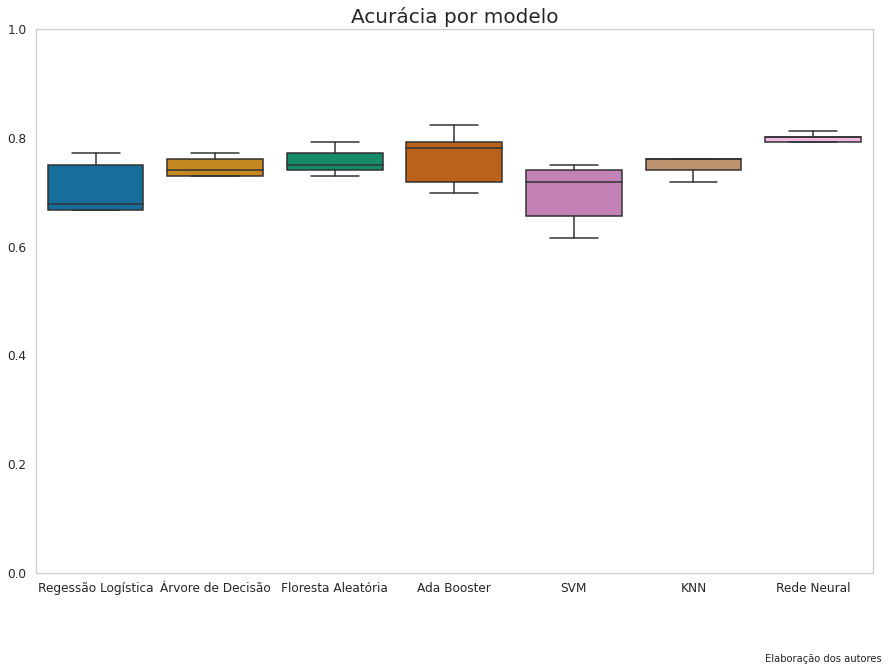

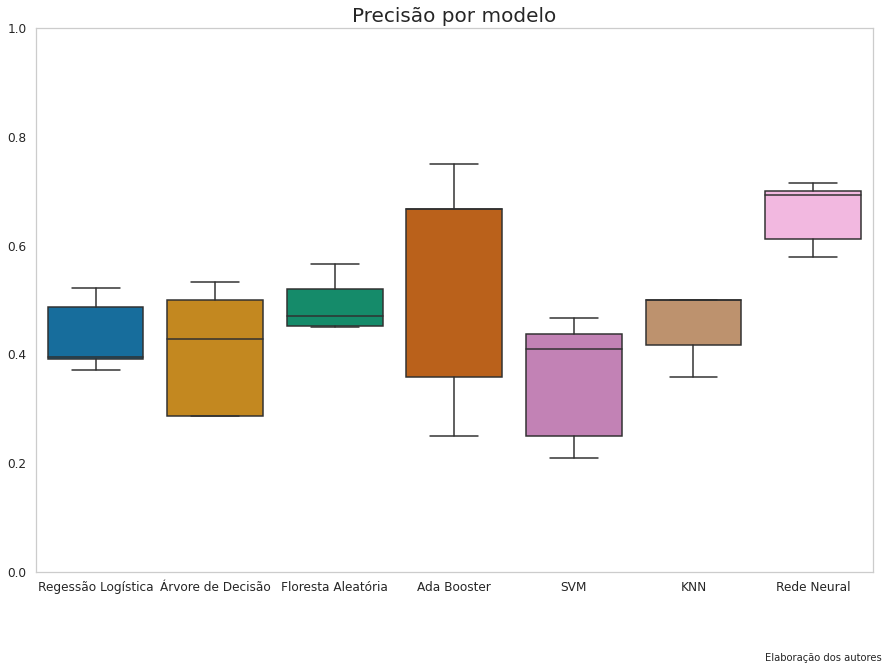

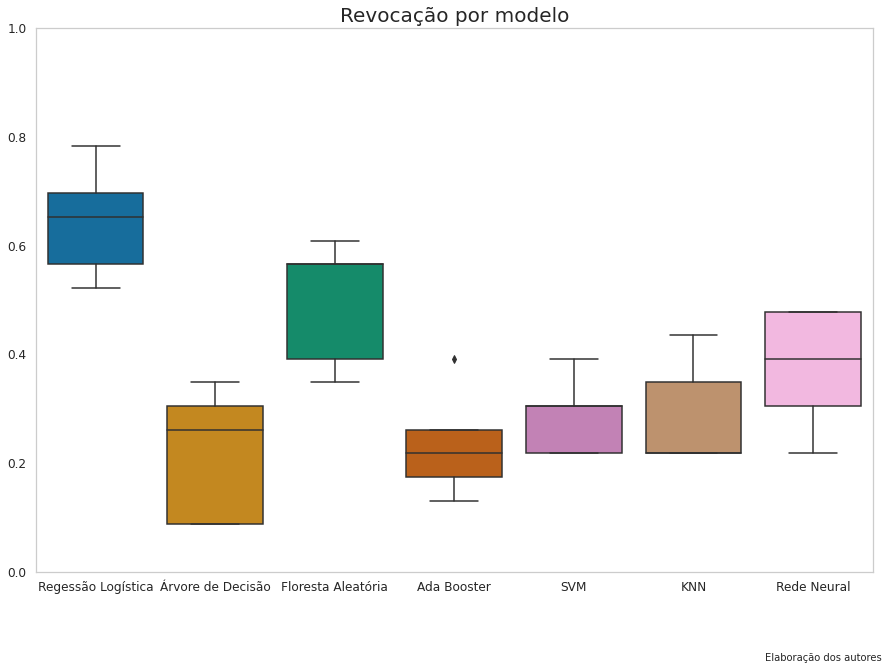

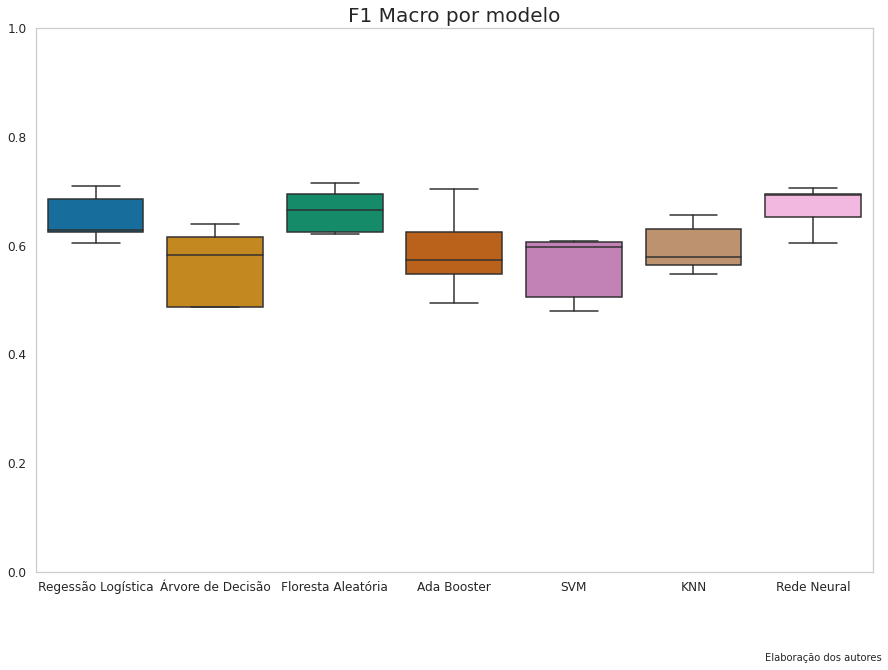

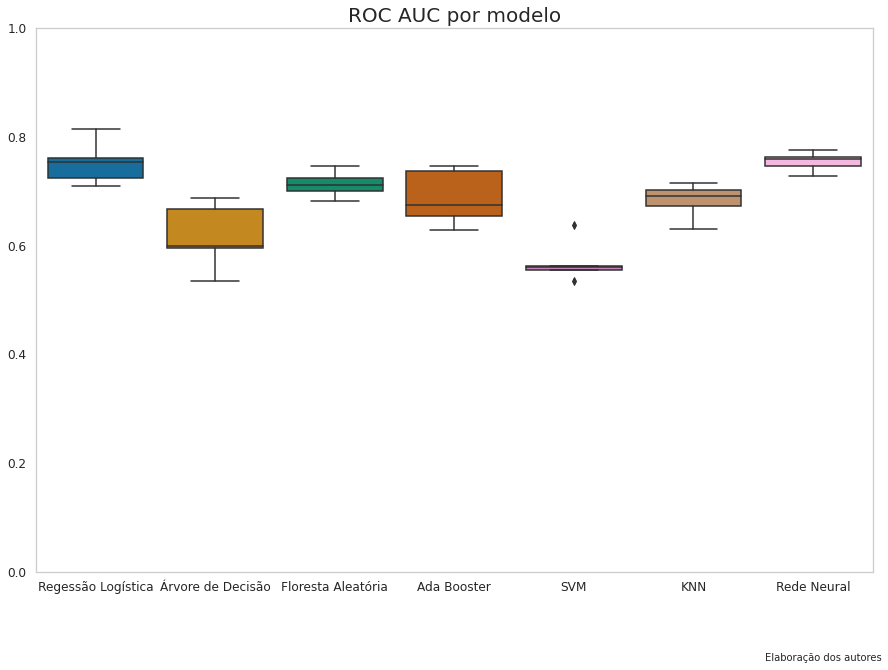

time: 1.84 s (started: 2021-04-26 23:41:23 +00:00)


In [39]:
for métrica, nome_métrica in zip(métricas, nomes_métricas): 
  plt.figure(figsize = (15,10))
  sns.boxplot(data = DF_resultados_cross_validation[métrica].T, palette = "colorblind")
  plt.title(f"{nome_métrica} por modelo", fontsize=20)
  plt.ylim(0, 1)
  plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)
  plt.show()

## Treinando e testando modelos

Uma vez selecionados os hiperparâmetros, treinamos os modelos infra com os dados de treino, testamos com os dados de teste e retornamos as matrizes de confusão abaixo. 



In [40]:
# Definindo a paleta de cores
cmap = "viridis"

time: 1.63 ms (started: 2021-04-26 23:41:25 +00:00)


Text(0.8, 0.001, 'Elaboração dos autores')

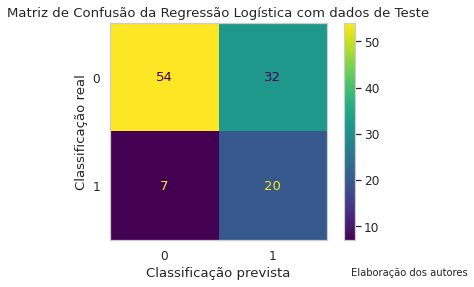

time: 248 ms (started: 2021-04-26 23:41:25 +00:00)


In [41]:
# Treinando a Regressão Logística
começo = time.time()
LR.fit(X_train,y_train)
fim = time.time()

# Definindo o tempo de treinamento da Regressão Logística
tempo_RL = fim - começo

# Matriz de confusão
plot_confusion_matrix(LR, 
                      X_test, 
                      y_test, 
                      cmap = cmap)
plt.grid(False)
plt.title("Matriz de Confusão da Regressão Logística com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


Text(0.8, 0.001, 'Elaboração dos autores')

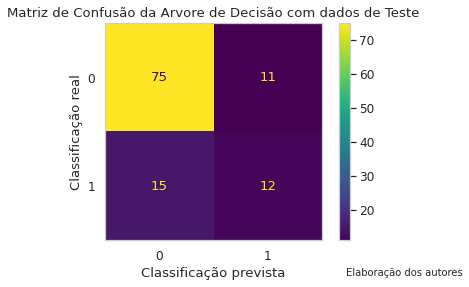

time: 258 ms (started: 2021-04-26 23:41:26 +00:00)


In [42]:
# Treinando a Árvore de Decisão
começo = time.time()
AD.fit(X_train, y_train)
fim = time.time()

# Definindo o tempo de treinamento da Àrvore de Decisão
tempo_AD = fim - começo

# Matriz de confusão
plot_confusion_matrix(AD, 
                      X_test, 
                      y_test, 
                      cmap = cmap)
plt.grid(False)
plt.title("Matriz de Confusão da Arvore de Decisão com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


Text(0.8, 0.001, 'Elaboração dos autores')

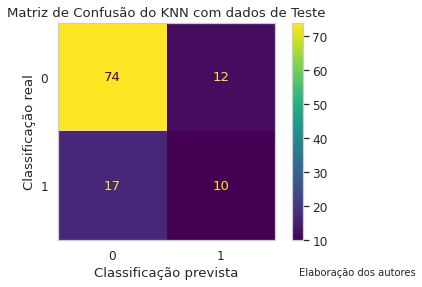

time: 263 ms (started: 2021-04-26 23:41:26 +00:00)


In [43]:
# Treinando o KNN 
começo = time.time()
KNN.fit(X_train, y_train)
fim = time.time()

# Definindo o tempo de treinamento do KNN
tempo_KNN = fim - começo

# Matriz de confusão
plot_confusion_matrix(KNN, 
                      X_test, 
                      y_test, 
                      cmap = cmap)
plt.grid(False)
plt.title("Matriz de Confusão do KNN com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


Text(0.8, 0.001, 'Elaboração dos autores')

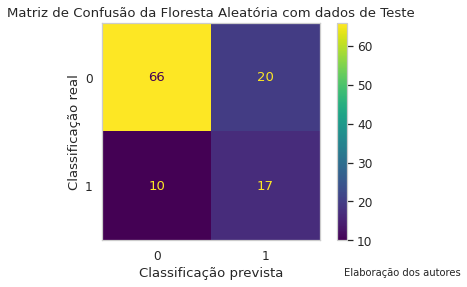

time: 1.3 s (started: 2021-04-26 23:41:26 +00:00)


In [44]:
# Treinando a Floresta Aleatória
começo = time.time()
RF.fit(X_train,y_train)
fim = time.time()

# Definindo o tempo de treinamento da Floresta Aleatória
tempo_RF = fim - começo

# Matriz de confusão
plot_confusion_matrix(RF, 
                      X_test, 
                      y_test, 
                      cmap = cmap)
plt.grid(False)
plt.title("Matriz de Confusão da Floresta Aleatória com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


Text(0.8, 0.001, 'Elaboração dos autores')

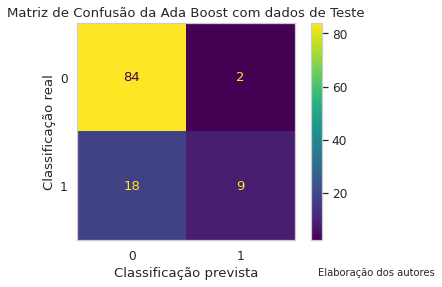

time: 427 ms (started: 2021-04-26 23:41:27 +00:00)


In [45]:
# Treinando a Ada Booster
começo = time.time()
CLF.fit(X_train, y_train)
fim = time.time()

# Definindo o tempo de treinamento da Ada
tempo_CLF = fim - começo

# Matriz de confusão
plot_confusion_matrix(CLF, 
                      X_test, 
                      y_test, 
                      cmap = cmap)
plt.grid(False)
plt.title("Matriz de Confusão da Ada Boost com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


Text(0.8, 0.001, 'Elaboração dos autores')

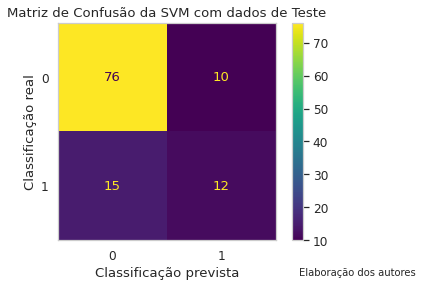

time: 272 ms (started: 2021-04-26 23:41:28 +00:00)


In [46]:
# Treinando a SVM
começo = time.time()
SVM.fit(X_train, y_train)
fim = time.time()

# Definindo o tempo de treinamento SVM
tempo_SVM = fim - começo

# Matriz de confusão
plot_confusion_matrix(SVM, 
                      X_test, 
                      y_test, 
                      cmap = cmap)
plt.grid(False)
plt.title("Matriz de Confusão da SVM com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real") 
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.8, 0.001, 'Elaboração dos autores')

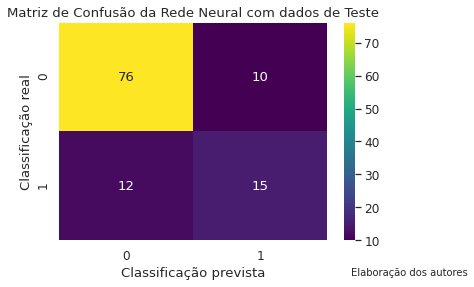

time: 7.69 s (started: 2021-04-26 23:41:28 +00:00)


In [47]:
# Treinando a RNA
começo = time.time()
RNA.fit(X_train, y_train)
fim = time.time()

# Definindo o tempo de treinamento da RNA
tempo_RNA = fim - começo

# Matriz de confusão
y_pred = RNA.predict(X_test)
sns.heatmap(data = confusion_matrix(y_test, y_pred), annot = True, cmap= cmap)
plt.title("Matriz de Confusão da Rede Neural com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


In [48]:
# Separando o tempo de teste de cada um dos modelos

# Regressão Logística

começo = time.time()
LR.predict(X_test)
fim = time.time()
tempo_RL_teste = fim - começo

# Árvore de Decisão
começo = time.time()
AD.predict(X_test)
fim = time.time()
tempo_AD_teste = fim - começo

# KNN 
começo = time.time()
KNN.predict(X_test)
fim = time.time()
tempo_KNN_teste = fim - começo

# Floresta Aleatória
começo = time.time()
RF.predict(X_test)
fim = time.time()
tempo_RF_teste = fim - começo

#Ada Booster
começo = time.time()
CLF.predict(X_test)
fim = time.time()
tempo_CLF_teste = fim - começo

#SVM 
começo = time.time()
SVM.predict(X_test)
fim = time.time()
tempo_SVM_teste = fim - começo

# RNA
começo = time.time()
RNA.predict(X_test)
fim = time.time()
tempo_RNA_teste = fim - começo


time: 156 ms (started: 2021-04-26 23:41:36 +00:00)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
del y_pred

time: 1.23 ms (started: 2021-04-26 23:41:36 +00:00)


## Comparação dos modelos

Finalmente, criamos um data frame para comparar os modelos utilizando as métricas indicadas. Também criamos mapas de calor para o fim de verificar o tempo de treinamento e teste dos modelos.

In [50]:
# Criando um Data Frame de resultados:

DF_resultados = pd.DataFrame(data = np.zeros((len(Modelos),5)))

DF_resultados.rename(columns = {0: "Acurácia", 
                                1: "Precisão", 
                                2: "Revocação", 
                                3: "F1 Macro", 
                                4: "ROC AUC"}, inplace = True)


# Loop de teste dos modelos

for i, modelo in zip(range(len(Nomes_modelos)), Modelos):

    y_pred = modelo.predict(X_test) 

    DF_resultados.iloc[i,0] =  accuracy_score(y_test, y_pred)
    DF_resultados.iloc[i,1] =  precision_score(y_test, y_pred)
    DF_resultados.iloc[i,2] =  recall_score(y_test, y_pred)
    DF_resultados.iloc[i,3] =  f1_score(y_test, y_pred, average = "macro")
    DF_resultados.iloc[i,4] =  roc_auc_score(y_test, y_pred)

    DF_resultados.rename(index = {i: Nomes_modelos[i]}, inplace = True)

DF_resultados

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Acurácia,Precisão,Revocação,F1 Macro,ROC AUC
Regessão Logística,0.65,0.38,0.74,0.62,0.68
Árvore de Decisão,0.77,0.52,0.44,0.67,0.66
Floresta Aleatória,0.73,0.46,0.63,0.67,0.70
Ada Booster,0.82,0.82,0.33,0.68,0.66
SVM,0.78,0.55,0.44,0.67,0.66
KNN,0.74,0.45,0.37,0.62,0.62
Rede Neural,0.81,0.60,0.56,0.73,0.72


time: 206 ms (started: 2021-04-26 23:41:36 +00:00)


Text(0.7, 0, 'Elaboração dos autores')

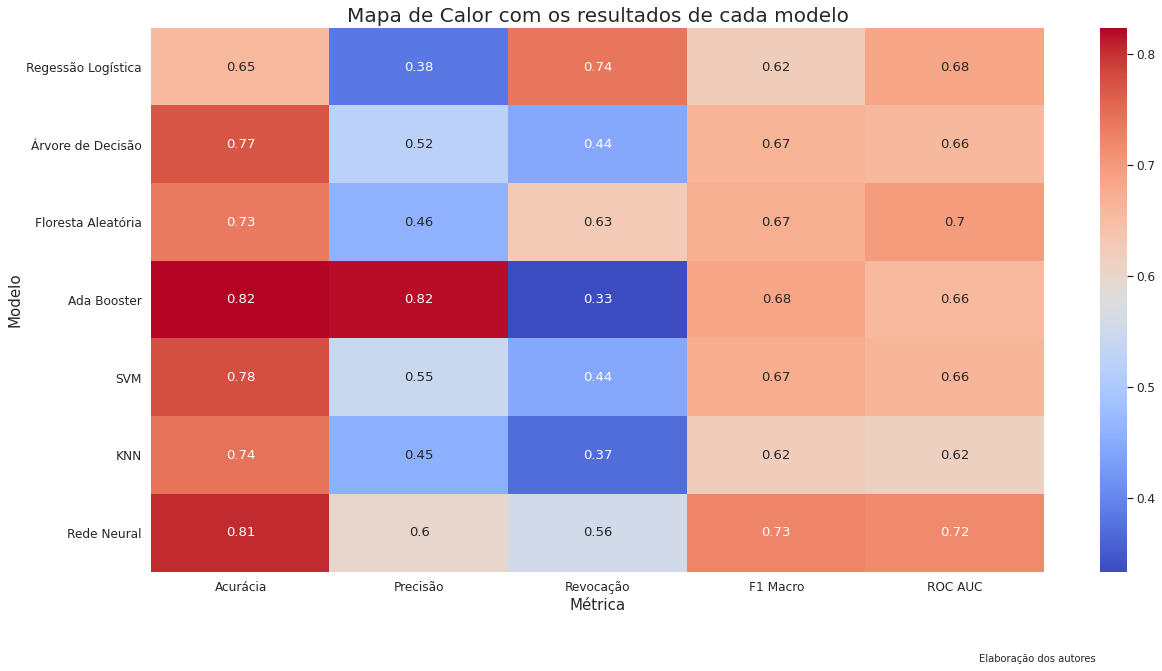

time: 622 ms (started: 2021-04-26 23:41:36 +00:00)


In [51]:
# Visualizando os resultados com mapa de calor

#Definindo o tamanho da visualização
plt.figure(figsize = (20,10))

# Definindo cores:
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Criando a visualização
sns.heatmap(data = DF_resultados, annot = True, cmap = cmap)

# Adicionando textos
plt.title("Mapa de Calor com os resultados de cada modelo", fontsize = 20)
plt.xlabel("Métrica", fontsize = 15)
plt.ylabel("Modelo", fontsize = 15)
plt.figtext(0.70,0, "Elaboração dos autores", fontsize = 10)


### Avaliando o tempo de treinamento dos modelos

In [52]:
# Separando o tempo de treinamento por modelo e renomeando o index
Modelos_tempo_treino = pd.DataFrame([tempo_RL,
                                     tempo_AD,
                                     tempo_KNN,
                                     tempo_RF,
                                     tempo_CLF,
                                     tempo_SVM,
                                     tempo_RNA])

for modelo, i in zip(Nomes_modelos, range(len(Nomes_modelos))):
  Modelos_tempo_treino.rename({i: modelo}, axis = 0, inplace = True)


time: 14.9 ms (started: 2021-04-26 23:41:37 +00:00)


Text(0.7, 0, 'Elaboração dos autores')

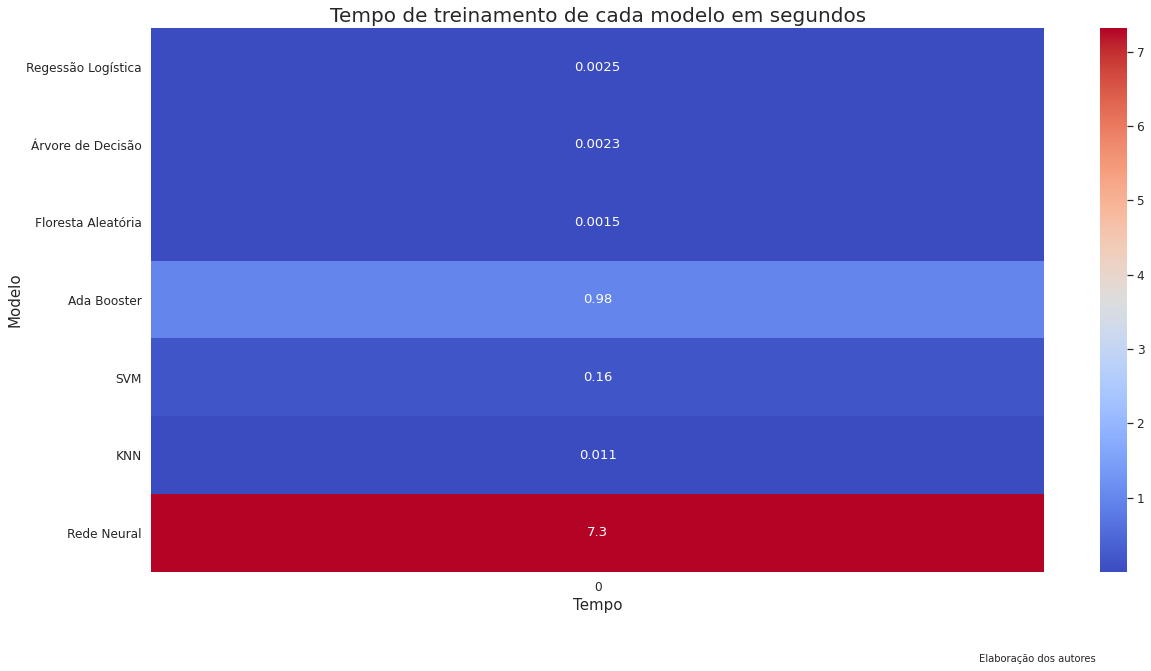

time: 457 ms (started: 2021-04-26 23:41:37 +00:00)


In [53]:
# Visualizando os resultados com mapa de calor

#Definindo o tamanho da visualização
plt.figure(figsize = (20,10))

# Definindo cores:
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Criando a visualização
sns.heatmap(data = Modelos_tempo_treino, annot = True, cmap = cmap)

# Adicionando textos
plt.title("Tempo de treinamento de cada modelo em segundos", fontsize = 20)
plt.xlabel("Tempo", fontsize = 15)
plt.ylabel("Modelo", fontsize = 15)
plt.figtext(0.70,0, "Elaboração dos autores", fontsize = 10)


### Avaliando o tempo de teste dos modelos

In [54]:
# Separando o tempo de teste por modelo e renomeando o index
Modelos_tempo_teste = pd.DataFrame([tempo_RL_teste,
                                     tempo_AD_teste,
                                     tempo_KNN_teste,
                                     tempo_RF_teste,
                                     tempo_CLF_teste,
                                     tempo_SVM_teste,
                                     tempo_RNA_teste])


for modelo, i in zip(Nomes_modelos, range(len(Nomes_modelos))):
  Modelos_tempo_teste.rename({i: modelo}, axis = 0, inplace = True)


time: 10.6 ms (started: 2021-04-26 23:41:37 +00:00)


Text(0.7, 0, 'Elaboração dos autores')

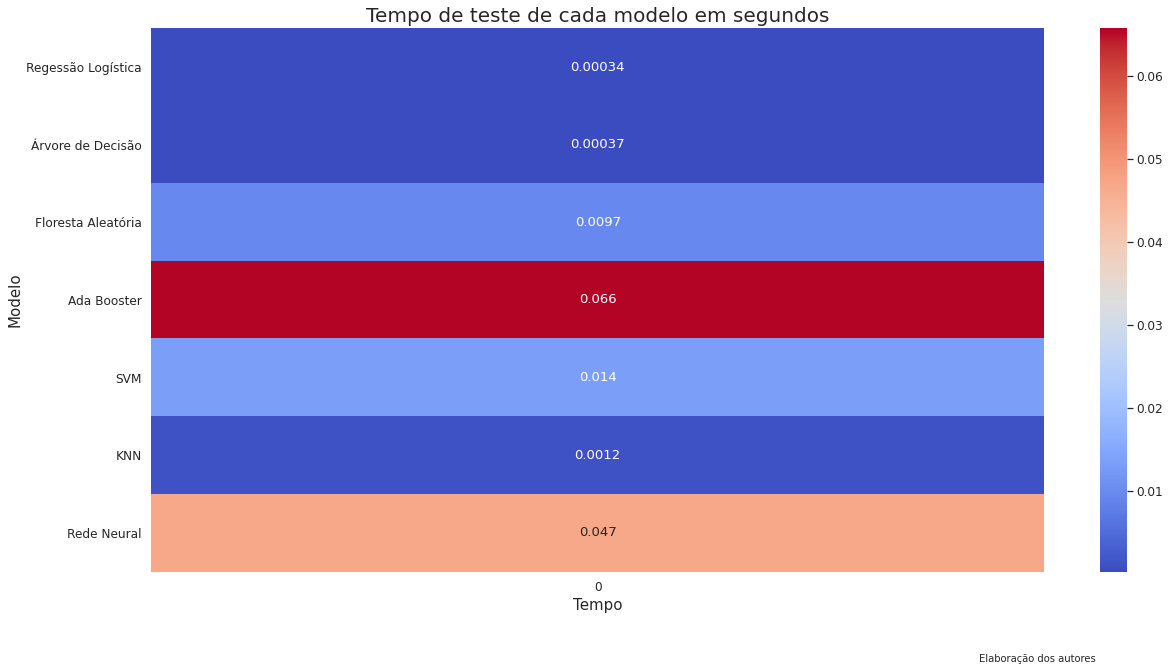

time: 440 ms (started: 2021-04-26 23:41:37 +00:00)


In [55]:
# Visualizando os resultados com mapa de calor

#Definindo o tamanho da visualização
plt.figure(figsize = (20,10))

# Definindo cores:
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Criando a visualização
sns.heatmap(data = Modelos_tempo_teste, annot = True, cmap = cmap)

# Adicionando textos
plt.title("Tempo de teste de cada modelo em segundos", fontsize = 20)
plt.xlabel("Tempo", fontsize = 15)
plt.ylabel("Modelo", fontsize = 15)
plt.figtext(0.70,0, "Elaboração dos autores", fontsize = 10)


## Escolha do modelo

Por se tratar de um modelo consistente, com bons resultados em geral e ótimos resultados de revocação (o que significa que ele capta grande parte dos valores positivos) além de menor tempo de teste quando comparado com modeos mais complexos (Ada e Rede Neural), escolheu-se a Floresta Aleatória como modelo preditivo de probabilidades.

## Previsão dos doadores



In [56]:
# Escalando a variável X
X = scaler.transform(X)

time: 2.71 ms (started: 2021-04-26 23:41:38 +00:00)


In [57]:
# Prevendo probabilidade de cada observação
pred_proba = pd.DataFrame(RF.predict_proba(X))

time: 112 ms (started: 2021-04-26 23:41:38 +00:00)


In [58]:
# Unindo com os dados limpos
df = df.join(pred_proba.iloc[:,1])
df.rename(columns = {1: "Probability of donation"}, inplace = True)
df.head(15)

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Probability of donation
0,2,50,98,1,0.70
1,0,13,28,1,0.43
2,1,16,35,1,0.51
3,2,20,45,1,0.92
4,1,24,77,0,0.48
5,4,4,4,0,0.70
6,2,7,14,1,0.68
7,1,12,35,0,0.43
8,2,9,22,1,0.68
9,5,46,98,1,0.69


time: 23.1 ms (started: 2021-04-26 23:41:38 +00:00)


In [59]:
# Salvando
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Trabalho em grupo/previsão de doadores.csv")

time: 13 ms (started: 2021-04-26 23:41:38 +00:00)


# **Referências**

## Artigos

### Sobre doações de sangue

BIANCO, Celso. Difficult blood donor choices: dance, feast or donate blood?. **Rev. Bras. Hematol. Hemoter**.,  São José do Rio Preto ,  v. 35, n. 4, p. 231-232,    2013 .   Disponível em: <http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1516-84842013000400231&lng=en&nrm=iso>. Acesso em:  07  Abr.  2021. 

DE ALMEIDA NETO, Cesar et al. Interdonation intervals and patterns of return among blood donors in Brazil. **Transfusion**, v. 52, n. 4, p. 722-728, 2012. Disponível em: <https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3257397/>. Acesso em: 07 Abr. 2021. 

OLIVEIRA, Claudia Di Lorenzo et al . Temporal distribution of blood donations in three Brazilian blood centers and its repercussion on the blood supply.** Rev. Bras. Hematol. Hemoter**.,  São José do Rio Preto ,  v. 35, n. 4, p. 246-251,    2013 .   Disponível em: <http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1516-84842013000400246&lng=en&nrm=iso>. Acesso em:  07  Abr.  2021.  

## Notícias

EVERINGTON, Keoni. Taiwan has highest blood donation rate in world: WHO. **Taiwan News**. 28 Jun. 2018. Disponível em: <https://www.taiwannews.com.tw/en/news/3458192>. Acesso em: 07 Abr. 2021.

Blood banks across Taiwan running low, donations needed. **Taiwan News**. 10 Ago. 2019. Disponível em: <https://www.taiwannews.com.tw/en/news/3761565>. Acesso em: 07 Abr. 2021.

TAIWAN BLOOD SERVICES FOUNDATION. Current Status of Blood Donation and Supply. Taiwan Blood Services Foundation. Disponível em: <http://www.blood.org.tw/Internet/english/docDetail.aspx?uid=7570&pid=7681&docid=32704>. Acesso em: 07 Abr. 2021.


**Base de dados**: 

[Predict Blood Donations](https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/page/7/)

A página pede para citar os dados como:

Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, “Knowledge discovery on RFM model using Bernoulli sequence”, Expert Systems with Applications, 2008. Disponível em: <https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center>. Acesso por último em: 19 Abr. 2021.



